In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.ticker import AutoMinorLocator
from notebook_utils import configure_path, setup_matplotlib

In [2]:
configure_path()
setup_matplotlib()

## Prevalence of CDNs serving popular sites

The shift from on-premises to third-party content and cloud providers is a global trend. These providers offer a pay you go model, which allows for flexible allocation of computing resources, ensures service availability, and removes various capital and operational expenditures. However, this migration to the cloud also introduces new challenges, including technical aspects crucial for meeting Quality of Service (QoS) objectives. Next, we continue our analysis by investigating whether Venezuela’s crisis impacted the adoption of third-party providers compared to other countries in the region.

To identify third-party adoption, we leverage the methodology proposed Kumar et al., and conduct a comparative analysis of Venezuela and other Latin American countries. This involves using a VPN service to obtain the perspective of a local user and retrieving a list of top 1,000 popular websites reported on Google’s cRuX. As a result of scraping each website, we identify the serving infrastructure for each component. Our analysis also compares HTTPS adoption growth in Venezuela relative to the rest of Latin America, aiming to determine any potential lag in this matter as well.

In [3]:
topsites = pd.read_csv(
    "data/processed/19-third-party-providers/all_topsites.csv"
)

In [4]:
topsites.head()

,Country,No. of top 1k sites using third-party DNS,No. of top 1k sites using HTTPS,No. of top 1k sites using third-party CAs,No. of top 1k sites using third-party CDNs
0,VE,335,769,309,509
1,BO,307,747,291,485
2,UY,370,780,339,545
3,PY,331,774,320,497
4,MX,375,763,359,572


In [5]:
nonoverlapping = pd.read_csv(
    "data/processed/19-third-party-providers/excluding_common_sites.csv"
)

In [6]:
nonoverlapping.head()

,Country,No. of non-overlapping sites using third-party DNS,No. of non-overlapping sites using HTTPS,No. of non-overlapping sites using third-party CAs,No. of non-overlapping sites using third-party CDNs,No. of top 1k sites non-overlapping with other countries,No. of top 1k sites overlapping with other countries
0,VE,147,298,112,188,514,486
1,BO,107,237,80,155,453,547
2,UY,206,362,154,266,563,437
3,PY,140,268,108,167,460,540
4,MX,190,324,168,272,530,470


DNS, 0.29 (0.32)
HTTPS, 0.58 (0.60)
CA, 0.22 (0.26)
CDN, 0.37 (0.46)


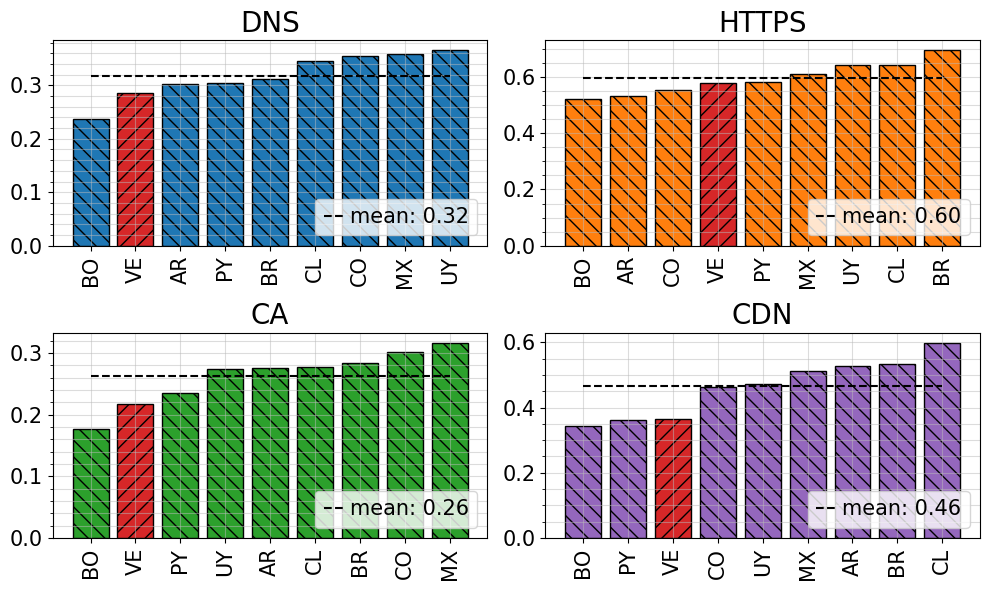

In [7]:
fig, _ax = plt.subplots(2, 2, figsize=(10, 6))

cols = list(nonoverlapping)
titles = ["DNS", "HTTPS", "CA", "CDN"]

for i in range(4):
    ax = _ax[int(i / 2)][i % 2]

    ax.yaxis.grid(True, linestyle="-", color="#bababa", alpha=0.5, which="both")
    ax.xaxis.grid(True, linestyle="-", color="#bababa", alpha=0.5, which="both")

    tmp = nonoverlapping.copy()
    tmp[cols[i + 1]] = tmp[cols[i + 1]] / tmp[cols[-2]]
    tmp = tmp.sort_values(cols[i + 1])

    ccs = tmp["Country"].values

    if i < 3:
        ci = i
    else:
        ci = i + 1

    color = np.repeat(f"C{ci}", tmp.shape[0])
    hatch = np.repeat("\\\\", tmp.shape[0])

    idx = np.where(ccs == "VE")[0][0]
    color[idx] = "C3"
    hatch[idx] = "//"

    p = ax.bar(
        np.arange(tmp.shape[0]),
        tmp[cols[i + 1]],
        edgecolor="k",
        lw=1,
        color=color,
        hatch=hatch,
    )

    m = tmp[cols[i + 1]].mean()

    ax.plot(
        np.arange(tmp.shape[0]),
        np.repeat(m, tmp.shape[0]),
        color="k",
        ls="--",
        label=f"mean: {m:.2f}",
    )

    print(
        f'{titles[i]}, {tmp.loc[tmp["Country"] == "VE"][cols[i + 1]].iloc[0]:.2f} ({m:.2f})'
    )

    ax.set_xticks(np.arange(tmp.shape[0]))
    ax.set_xticklabels(fontsize=20, labels=ccs, rotation=90)

    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.tick_params(labelsize=15)

    ax.set_title(titles[i], fontsize=20)

    ax.legend(
        loc="lower right",
        ncol=6,
        frameon=True,
        fontsize=15,
        handletextpad=0.25,
        columnspacing=0.5,
        handlelength=1.0,
    )

fig.subplots_adjust(hspace=0)
fig.tight_layout()
fig.savefig("figures/19-adoption_non_overlapping.pdf")

To assess the adoption of third-party providers, we examine four key variables identified in a prior work: (1) HTTPS adoption, (2) Third-party DNS adoption, (3) Third-party Certificate Authorities (CA) adoption, and (4) Third-party CDN adoption. Considering that many top sites are common across countries and are often served by large third-party providers, our analysis only includes those top sites that are unique to the list of top sites in a single country. This focused methodology allows for understanding each country’s adoption of third-party services.

The figure illustrates the proportion of each country’s unique top sites in the region that utilize HTTPS, DNS, CA, and CDN third-party providers. The analysis reveals that Venezuela ranks lower in adopting third-party DNS, CA, and CDN services, only ahead of Bolivia, which has the lowest GDP per capita in South America, with Venezuela excluded. Specifically, Venezuela’s adoption rates stand below the average for DNS at 0.29 (regional average 0.32), CA at 0.22 (0.26), and CDN at 0.37 (0.46), but slightly above for HTTPS at 0.58 (0.60). This indicates that Venezuela’s network infrastructure lags in yet another dimension, particularly in adopting third-party providers for content delivery.

In [8]:
nonoverlapping

,Country,No. of non-overlapping sites using third-party DNS,No. of non-overlapping sites using HTTPS,No. of non-overlapping sites using third-party CAs,No. of non-overlapping sites using third-party CDNs,No. of top 1k sites non-overlapping with other countries,No. of top 1k sites overlapping with other countries
0,VE,147,298,112,188,514,486
1,BO,107,237,80,155,453,547
2,UY,206,362,154,266,563,437
3,PY,140,268,108,167,460,540
4,MX,190,324,168,272,530,470
5,BR,256,573,234,439,823,177
6,AR,181,318,165,316,598,402
7,CO,214,333,182,279,602,398
8,CL,208,388,167,361,603,397
